¿Me puedo comer este hongo?

Introducción:
En el presente Trabajo Práctico se va a crear un modelo de una red neuronal a partir del cuál conociendo ciertos atributos del hongo que te encontras caminando por la senda de treking o en el patio de tu casa después de un día de lluvia o caminando por el campus sabes si sirve para la sopa o te arriesgas a envenenarte.

PARTE 1

Análisis de Base de Datos:

Se seleccionó una base de datos en el cual se encuentran más de 8000 distintas especies de hongos analizadas.
Las variables que tiene en consideración el dataset son las siguientes 23:

Clase (class): comestible (edible)=e, venenoso (poisonous)=p

Forma del píleo o sombrero de la seta (cap-shape): campana (bell)=b, cónica (conical)=c, convexa (convex)=x, plana (flat)=f, umbonada (knobbed)=k, hundida (sunken)=s

Superficie del píleo (cap-surface): fibrosa (fibrous)=f, crestada (grooves)=g, escamosa (scaly)=y, lisa (smooth)=s

Color del píleo (cap-color): marrón (brown)=n, crema (buff)=b,canela (cinnamon)=c, gris (gray)=g, verde (green)=r, rosa (pink)=p,violeta (purple)=u, rojo (red)=e, blanco (white)=w, amarillo (yellow)=y

Tiene moretones (bruises): sí (bruises)=t,no=f

Olor (odor): almendrado (almond)=a, anis (anise)=l, creosota (creosote)=c, pesacado (fishy)=y, mal olor (foul)=f, humedad (musty)=m, sin olor (none)=n, acre (pungent)=p, picante (spicy)=s

Unión de las branquias o láminas al estípite (gill-attachment): adjuntas (attached)=a, decorriente (descending)=d, gratis (free)=f, ondeado (notched)=n

Distancia entre branquias (gill-spacing): cercanas (close)=c, divididas (crowded)=w, separadas (distant)=d

Tamaño de las branquias (gill-size): anchas (broad)=b, estrechas (narrow)=n

Color de las branquias (gill-color): negro (black)=k, marrón (brown)=n, crema (buff)=b,chocolate (chocolate)=h,gris (gray)=g, verde (green)=r, naranja (orange)=o, rosa (pink)=p, violeta (purple)=u, rojo (red)=e, blanco (white)=w,amarillo (yellow)=y

Forma del estipe (stalk-shape): ensanchado (enlarging)=e, achicado (tapering)=t

Raíz del estípe (stalk-root): bulbosa (bulbous)=b, hernia (club)=c,copa (cup)=u, igual (equal)=e,rizomorfa (rhizomorphs)=z, enraizada (rooted)=r, faltante (missing)=?

Superficie del estípe por encima del anillo (stalk-surface-above-ring): fibrosa (fibrous)=f, escamosa (scaly)=y,sedosa (silky)=k,lisa (smooth)=s

Superficia del estípe por debajo del anillo (stalk-surface-below-ring): fibrosa (fibrous)=f, escamosa (scaly)=y, sedora (silky)=k, lisa (smooth)=s

Color del estípe por encima del anillo (stalk-color-above-ring): marrón (brown)=n, crema (buff)=b, canela (cinnamon)=c, gris (gray)=g, naranja (orange)=o, rosa (pink)=p, rojo (red)=e, blanco (white)=w, amarillo (yellow)=y

Color del estípe por debajo del anillo (stalk-color-below-ring): marrón (brown)=n, crema (buff)=b, canela (cinnamon)=c, gris (gray)=g, naranja (orange)=o, rosa (pink)=p, rojo (red)=e, blanco (white)=w, amarillo (yellow)=y

Tipo de velo (veil-type): parcial (partial)=p, universal=u

Color del velo (veil-color): marrón (brown)=n, naranja (orange)=o, blanco (white)=w, amarillo (yellow)=y

Número de anillos (ring-number): ninguno (none)=n, uno (one)=o, dos (two)=t

Tipo de anillo (ring-type): cortina (cobwebby)=c, efimero (evanescent)=e, para arriba (flaring)=f, largo (large)=l,sin anillo (none)=n, colgante (pendant)=p, envainado (sheathing)=s, zona anular (zone)=z

Color de las esporas (spore-print-color): negro (black)=k, marrón (brown)=n, crema (buff)=b, chocolate (chocolate)=h, verde (green)=r, naranja (orange)=o, violeta (purple)=u, blanco (white)=w, amarillo (yellow)=y

Población (population): abundante (abundant)=a, agrupada (clustered)=c, numerosa (numerous)=n, dispersa (scattered)=s, varios (several)=v, solitario (solitary)=y

Habitat: pastos (grasses)=g, hojas (leaves)=l, prados (meadows)=m, caminos (paths)=p,urbanos (urban)=u, desechos (waste)=w, bosques (woods)=d



Primero vamos a cargar el archivo de la base de datos csv describiendo cada una de las columnas.

Ya que mi base de datos no es númerica sino más bien categórica, voy a transformar las variables a números para poder procesar los cálculos matemáticos que son necesarios para la red neuronal.

Para ello, investigué cómo convertir variables categóricas a valores numéricos:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()

LabelEncoder: Es una herramienta de scikit-learn que convierte cada valor único de una columna en un número entero.

df.apply(LabelEncoder().fit_transform):

Aplica LabelEncoder a cada columna del DataFrame.
Cada columna es transformada de manera independiente.
Esto se hace automáticamente para todas las columnas del df.

De esta forma transforme las variables a números permitiendo que el modelo los interprete y aprenda de ellos.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns               #Representan los valores atípicos automáticamente en un boxplot con Seaborn y Matplotlib
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split

#Cargo la base de datos de un archivo csv describiendo el nombre de cada columna
df = pd.read_csv('mushrooms (1).csv', delimiter=',')
df.columns = ['Class','Cap-Shape','Cap-Suface','Cap-Colour','Bruises','Odor','Gill-Attachment','Gill-Spacing','Gill-Size','Gill-Colour','Stalk-Shape','Stalk-Root','Stalk-Surface-Above-Ring','Stalk-Surface-Below-Ring', 'Stalk-Colour-Above-Ring','Stalk-Colour-Below-Ring','Veil-Type','Veil-Colour','Ring-Number','Ring-Type','Spore-Print-Colour','Population','Habitat']

df.head() # Primeras filas del DataFrame

,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
df.tail()

,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [3]:
df.shape #Tamaño de la base de datos

(8124, 23)

In [4]:
df.isnull().sum() #Para saber cuántos valores faltantes tiene cada columna

Class                       0
Cap-Shape                   0
Cap-Suface                  0
Cap-Colour                  0
Bruises                     0
Odor                        0
Gill-Attachment             0
Gill-Spacing                0
Gill-Size                   0
Gill-Colour                 0
Stalk-Shape                 0
Stalk-Root                  0
Stalk-Surface-Above-Ring    0
Stalk-Surface-Below-Ring    0
Stalk-Colour-Above-Ring     0
Stalk-Colour-Below-Ring     0
Veil-Type                   0
Veil-Colour                 0
Ring-Number                 0
Ring-Type                   0
Spore-Print-Colour          0
Population                  0
Habitat                     0
dtype: int64

In [5]:
#Ahora transformo las variables categóricas en numéricas
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [6]:
df.head()


,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
df.tail()

,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,1,2


Usando los gráficos de cajas, nos da una idea de qué variables tienen valores atípicos y cuántas filas presentan dichos outliers.


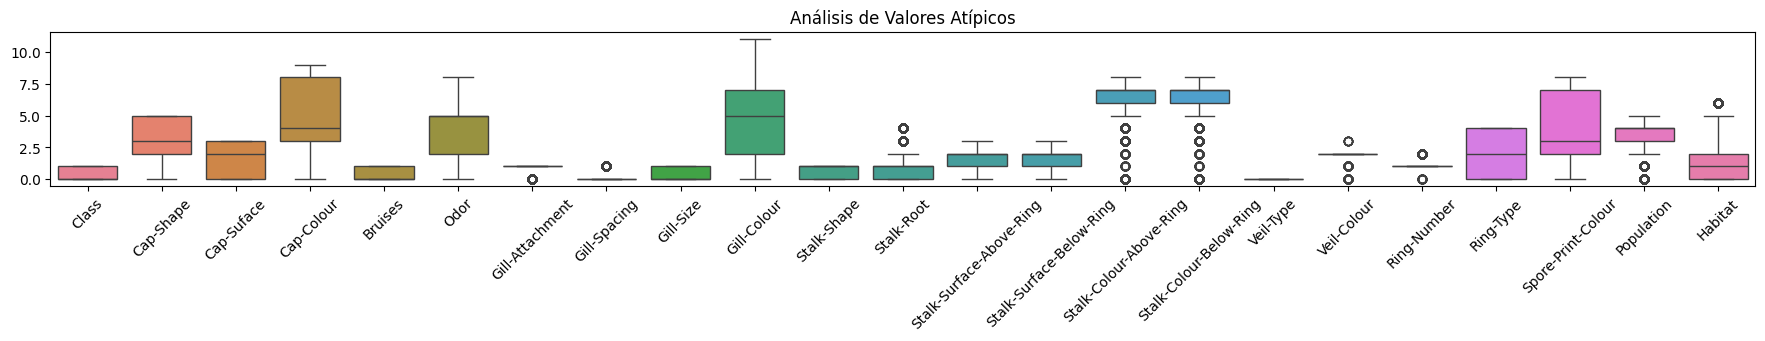

Filas con Valores Atípicos: 4524


In [8]:
#Generamos gráficos con el método de rango intercuartílico (IQR) llamados boxplots
#Representación gráfica de los cuartiles, mediana y outlier (valores atípicos)

plt.figure(figsize=(22, 2))
sns.boxplot(data=df)          
plt.title('Análisis de Valores Atípicos')
plt.xticks(rotation=45)
plt.show()

# Calcular el rango intercuartílico para cada columna numérica
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1) #Para identificar valores atípicos usando el rango intercuartílico

num_outliers = outliers.sum()
print("Filas con Valores Atípicos:", num_outliers)

#El rectángulo de color es la representación gráfica del IQR; la línea dentro del IQR representa la mediana; 
# mientras que los valores atípicos están representados por los círculos fuera del gráfico


Gracias a la representación gráfica vemos que hay un par de columnas que presentas valores atípicos, por lo que podemos normalizar los datos utilizando Standar Scaler. Esta herramienta se utiliza antes de entrenar la red neuronal, y su propósito principal es normalizar los datos.

Decido elimiar los outliers ya que las columnas que presentan los valores atípicos no son esenciales para la detección de si un hongo es o no es venenoso.
Este análisis lo veremos más adelante, por ahora simplemente definimos el nuevo data set sin valores atípicos.

In [9]:
df_sin_outliers = df[~outliers].copy() # Eliminar las filas con al menos un valor atípico

print("Tamaño del dataset sin outliers:", df_sin_outliers.shape)


Tamaño del dataset sin outliers: (3600, 23)


In [10]:
df_sin_outliers.head()

,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3


In [11]:
df_sin_outliers.tail()

,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
8113,1,3,3,2,0,8,1,0,1,0,...,1,6,6,0,2,1,0,7,4,0
8116,1,3,3,4,0,7,1,0,1,0,...,1,6,7,0,2,1,0,7,4,2
8117,1,3,2,2,0,8,1,0,1,0,...,2,6,7,0,2,1,0,7,4,0
8118,1,3,3,4,0,2,1,0,1,0,...,2,6,7,0,2,1,0,7,4,0
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


No tiene sentido utilizar el resumen estadístico ya que originalmente las variables eran categóricas.
Pero a fines del Trabajo Práctico vamos a usar Standar Scaler para ver cuáles columnas nos ayudan más al análisis de si un hongo es venenoso o no.


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_n = scaler.fit_transform(df_sin_outliers)  
df_n = pd.DataFrame(df_n, columns=df_sin_outliers.columns)
# Mostrar el DataFrame normalizado
df_n.head()

,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
0,-1.307992,1.042991,-0.169424,2.011223,1.138384,-1.686025,0.0,0.0,-1.050145,0.160118,...,0.644525,0.793999,0.772178,0.0,0.0,0.0,1.056082,-0.590342,-2.577609,-0.331021
1,-1.307992,-2.048879,-0.169424,1.601883,1.138384,-0.524732,0.0,0.0,-1.050145,0.421654,...,0.644525,0.793999,0.772178,0.0,0.0,0.0,1.056082,-0.590342,-2.577609,0.870265
2,-1.307992,1.042991,0.833742,2.011223,1.138384,-1.686025,0.0,0.0,-1.050145,0.421654,...,0.644525,0.793999,0.772178,0.0,0.0,0.0,1.056082,-0.989222,-2.577609,-0.331021
3,-1.307992,-2.048879,-0.169424,1.601883,1.138384,-1.686025,0.0,0.0,-1.050145,-0.362954,...,0.644525,0.793999,0.772178,0.0,0.0,0.0,1.056082,-0.989222,-2.577609,0.870265
4,-1.307992,-2.048879,0.833742,1.601883,1.138384,-0.524732,0.0,0.0,-1.050145,0.421654,...,0.644525,0.793999,0.772178,0.0,0.0,0.0,1.056082,-0.590342,-1.196747,0.870265


In [13]:
df_n.tail()

,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
3595,0.764531,-0.193757,0.833742,-0.854156,-0.878438,1.410756,0.0,0.0,0.95225,-0.886027,...,-1.041732,-1.259447,-1.248056,0.0,0.0,0.0,-0.996777,1.005177,0.184115,-0.931664
3596,0.764531,-0.193757,0.833742,-0.035476,-0.878438,1.023658,0.0,0.0,0.95225,-0.886027,...,-1.041732,-1.259447,0.772178,0.0,0.0,0.0,-0.996777,1.005177,0.184115,0.269622
3597,0.764531,-0.193757,-0.169424,-0.854156,-0.878438,1.410756,0.0,0.0,0.95225,-0.886027,...,0.644525,-1.259447,0.772178,0.0,0.0,0.0,-0.996777,1.005177,0.184115,-0.931664
3598,0.764531,-0.193757,0.833742,-0.035476,-0.878438,-0.911830,0.0,0.0,0.95225,-0.886027,...,0.644525,-1.259447,0.772178,0.0,0.0,0.0,-0.996777,1.005177,0.184115,-0.931664
3599,0.764531,-0.193757,0.833742,-0.035476,-0.878438,1.410756,0.0,0.0,0.95225,-0.886027,...,-1.041732,0.793999,0.772178,0.0,0.0,0.0,-0.996777,1.005177,0.184115,0.269622


In [14]:
columnas_cero = df_n.columns[(df_n == 0).all()]
print("Columnas con todos ceros:", list(columnas_cero)) #Para identificar las columnas que no aportan

Columnas con todos ceros: ['Gill-Attachment', 'Gill-Spacing', 'Veil-Type', 'Veil-Colour', 'Ring-Number']


In [15]:
df_n.corr() #Para analizar la correlación de las variables
#Si el valor es +1 hay correlación positiva
#Si es 0 no hay correlación lineal
#Si el valor es -1 hay corelación negativa

,Class,Cap-Shape,Cap-Suface,Cap-Colour,Bruises,Odor,Gill-Attachment,Gill-Spacing,Gill-Size,Gill-Colour,...,Stalk-Surface-Below-Ring,Stalk-Colour-Above-Ring,Stalk-Colour-Below-Ring,Veil-Type,Veil-Colour,Ring-Number,Ring-Type,Spore-Print-Colour,Population,Habitat
Class,1.000000,0.094022,0.175731,-0.368782,-0.814597,0.208629,NaN,NaN,0.747534,-0.675898,...,-0.399564,-0.153083,-0.143743,NaN,NaN,NaN,-0.764861,0.620346,0.145425,0.358196
Cap-Shape,0.094022,1.000000,-0.072804,-0.126968,-0.075975,0.039292,NaN,NaN,0.066186,0.011527,...,-0.037322,-0.040859,-0.044714,NaN,NaN,NaN,-0.014707,-0.002565,0.143833,-0.057535
Cap-Suface,0.175731,-0.072804,1.000000,0.053760,-0.220764,0.072468,NaN,NaN,0.272930,-0.310739,...,-0.108830,0.038391,0.031746,NaN,NaN,NaN,-0.310744,0.298346,-0.176592,0.196986
Cap-Colour,-0.368782,-0.126968,0.053760,1.000000,0.299063,-0.444682,NaN,NaN,-0.359655,0.231333,...,0.104162,0.252317,0.257106,NaN,NaN,NaN,0.372659,-0.395392,-0.564991,0.058739
Bruises,-0.814597,-0.075975,-0.220764,0.299063,1.000000,-0.356851,NaN,NaN,-0.922487,0.768932,...,0.294105,0.255726,0.243703,NaN,NaN,NaN,0.927702,-0.790311,-0.246726,-0.183102
Odor,0.208629,0.039292,0.072468,-0.444682,-0.356851,1.000000,NaN,NaN,0.427332,-0.316216,...,-0.030236,-0.229869,-0.223911,NaN,NaN,NaN,-0.470064,0.502744,0.413765,-0.064161
Gill-Attachment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gill-Spacing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gill-Size,0.747534,0.066186,0.272930,-0.359655,-0.922487,0.427332,NaN,NaN,1.000000,-0.776256,...,-0.208562,-0.153020,-0.141995,NaN,NaN,NaN,-0.923441,0.895838,0.174914,0.176233
Gill-Colour,-0.675898,0.011527,-0.310739,0.231333,0.768932,-0.316216,NaN,NaN,-0.776256,1.000000,...,0.199632,0.173615,0.186334,NaN,NaN,NaN,0.829978,-0.802524,-0.020452,-0.297657


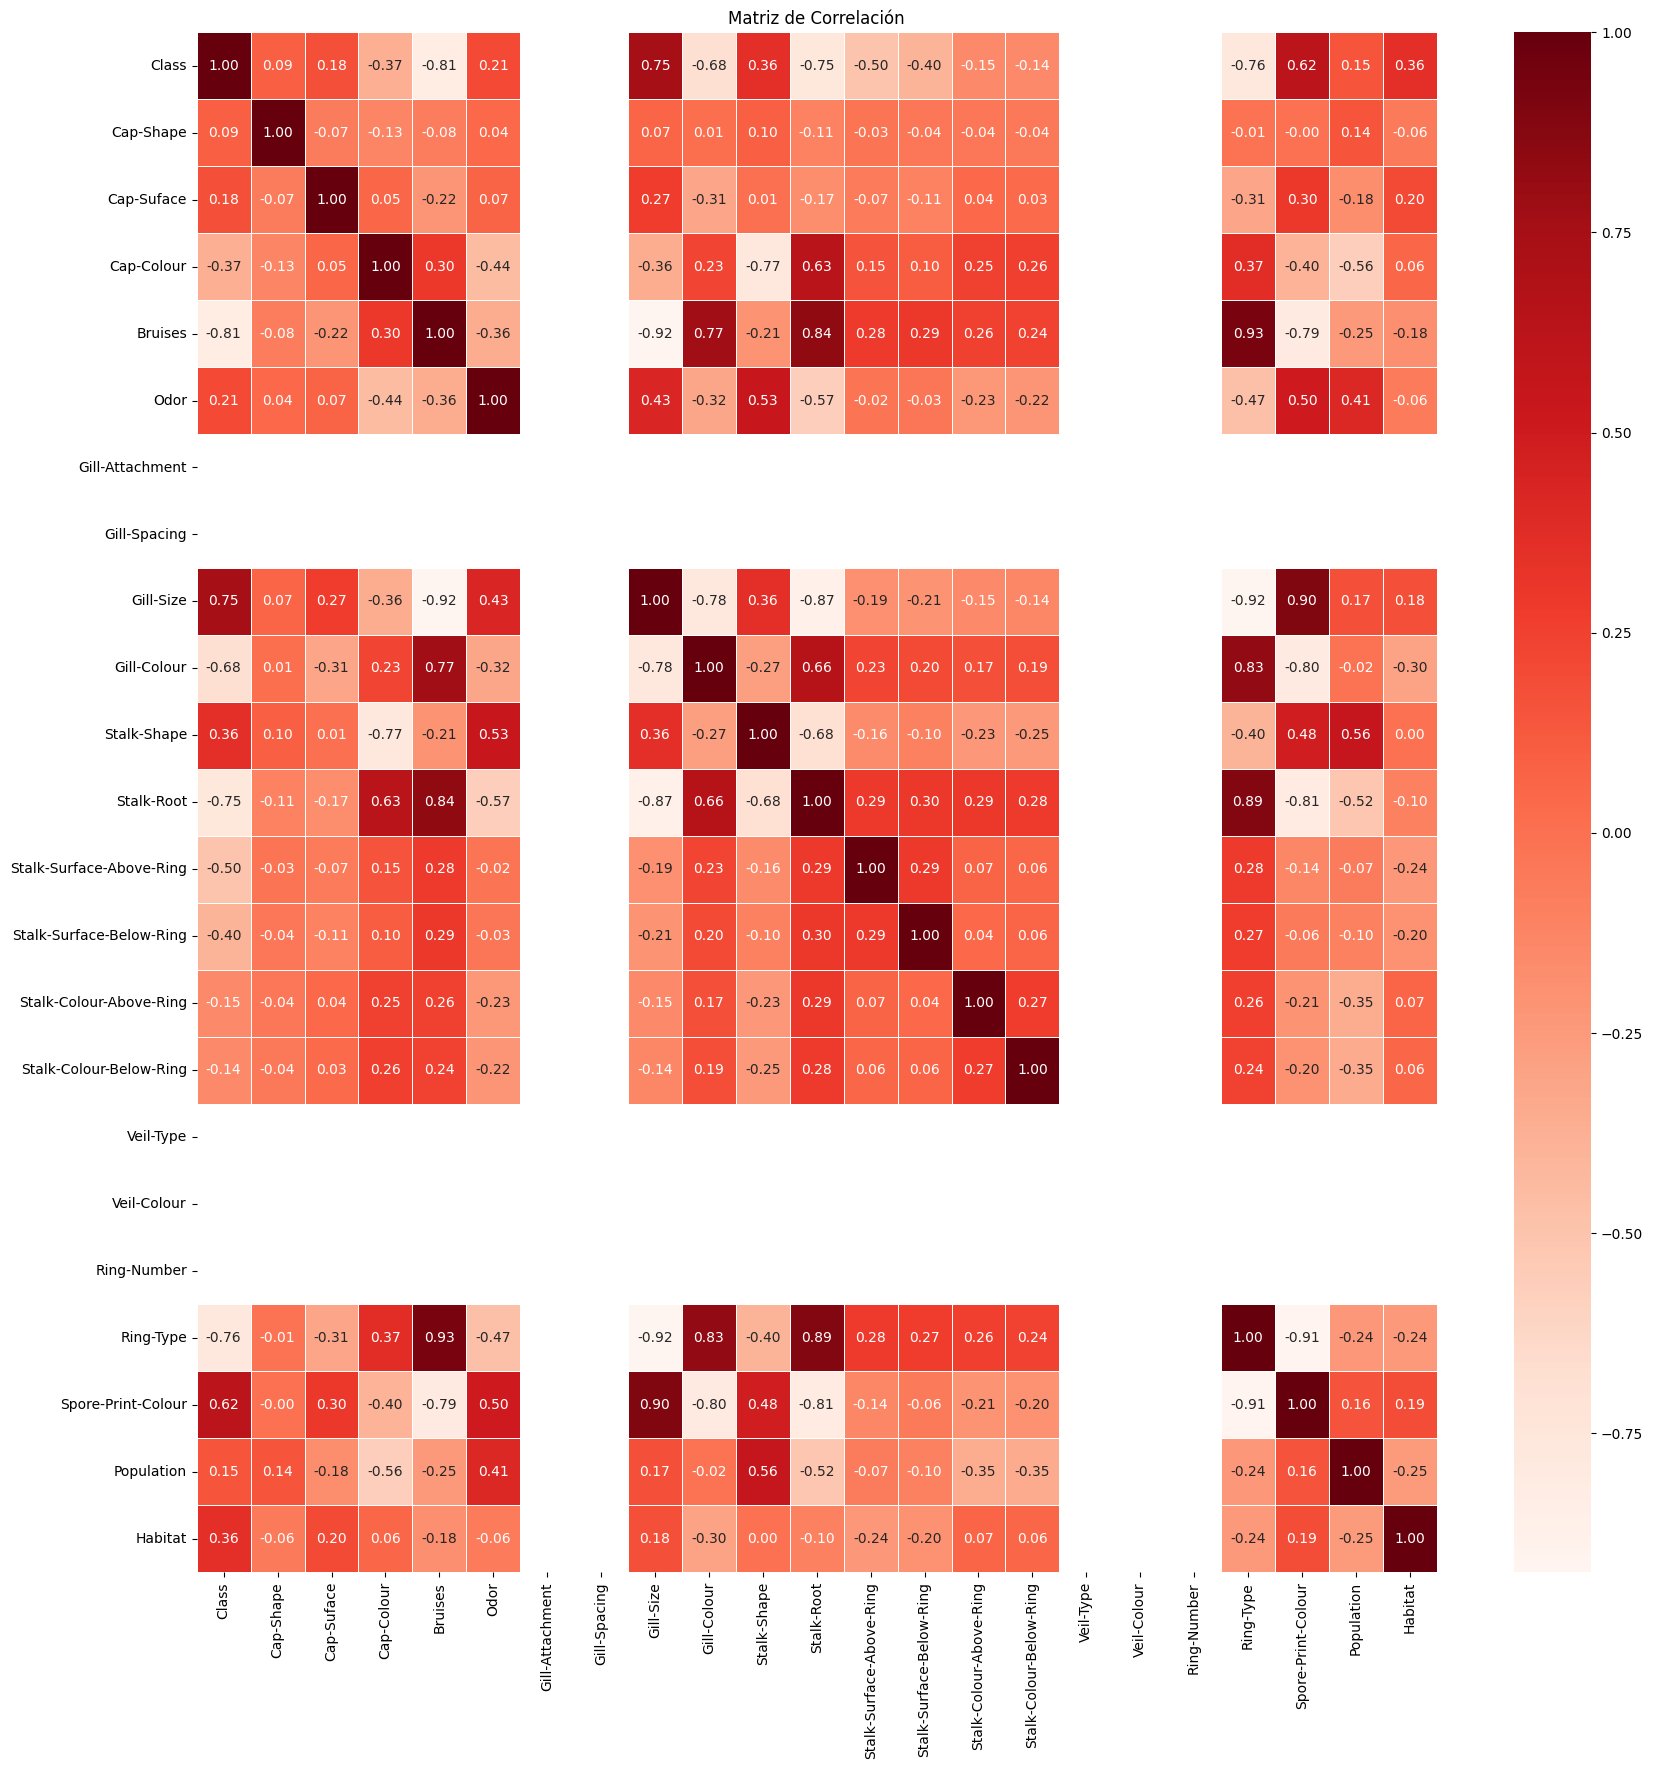

In [16]:
import matplotlib.pyplot as plt
trainup = pd.DataFrame(scaler.fit_transform(df_n), columns=df_n.columns)


plt.figure(figsize=(20, 20))
sns.heatmap(df_n.corr(), annot=True, cmap='Reds', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Tomamos las columnas que no sean nulas y las que tengan valores muy cercanos a 1 o a -1 como las más representativas para nuestro modelo que clasifica a los hongos en 2 clases: venenosos o no.

Las variables más relacionadas a que un hongo sea venenoso o no, según nuestra matriz, son: (recordar que son todas descripciones transformadas a variables numéricas)

Bruises: moretones presentes en el hongo.

Gill-Size: tamaño de las branquias.

Gill-Colour: color de las branquias.

Stalk-Shape: Forma del tallo.

Cap-Colour: color del sombrero

Stalk-Root: Base del tallo.

Ring-Type: Tipo de anillo

Spore-Print-Colour: Color que dejan las esporas



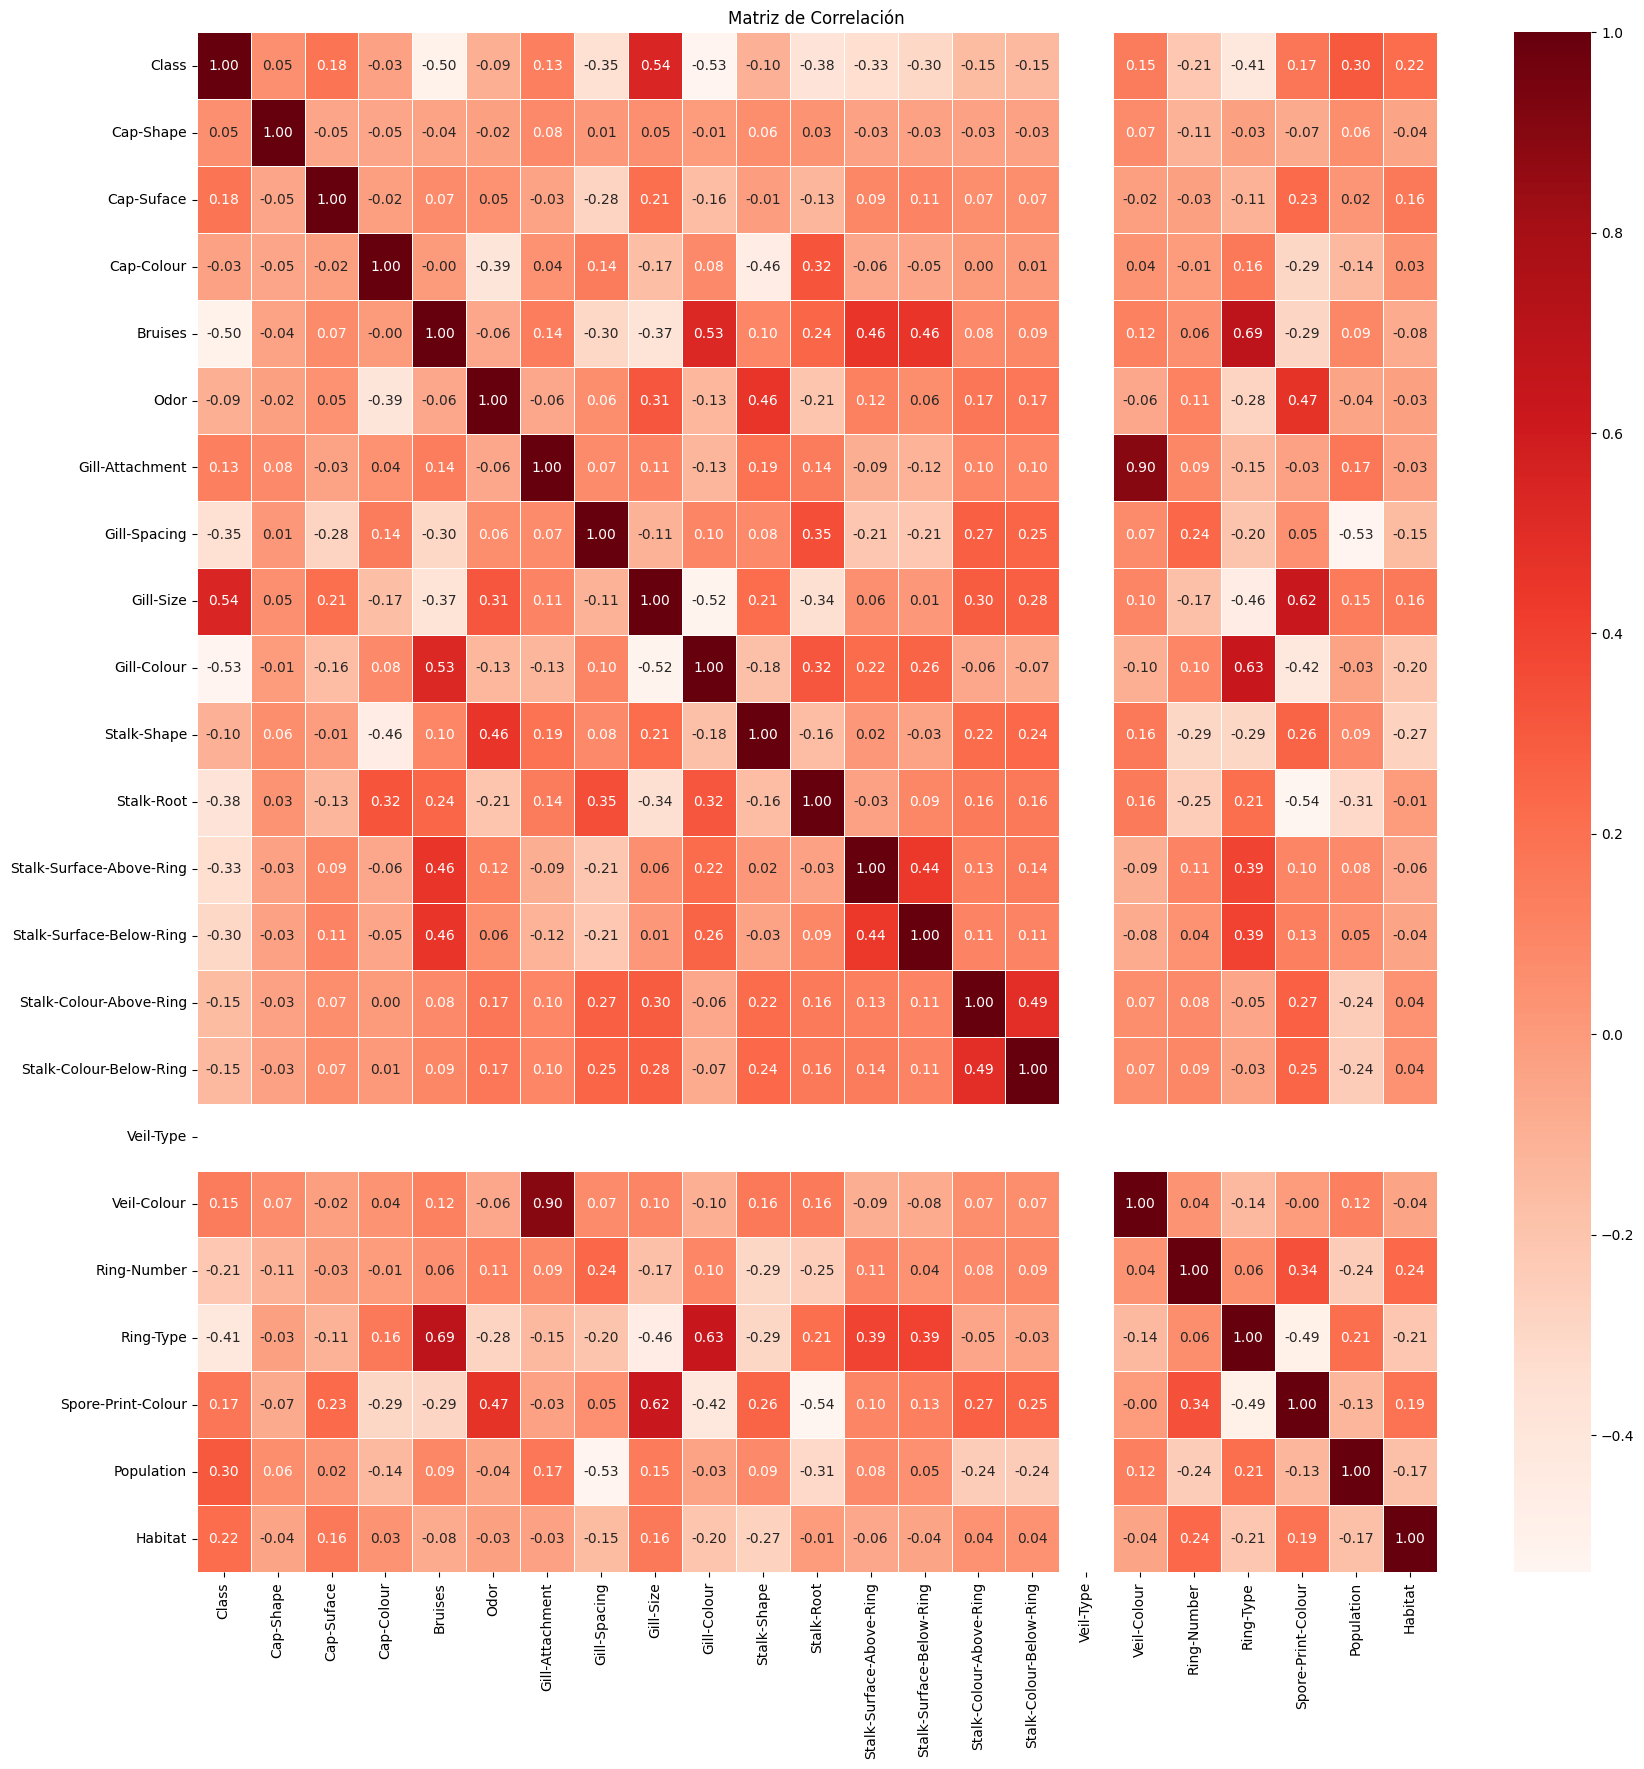

In [17]:
#Realizamos la misma matriz pero comparando con los datos con valores atípicos para ver si nuestra predicción inicial coincide con la hipótesis final

trainup = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='Reds', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Se ve que entre el Gill-Attachment y el color del velo hay un 0.90, pero después de todo es el único valor y podría ser una excepción. Con las variables elegidas vamos a entrenar nuestra red.
También se puede ver que todos los hongos de la base de datos tienen velo y que la presencia de este no influye en que sea o no venenoso.

PARTE 2

Desarrollo de la Red Neuronal

Valores de Entrada: van a ser las columnas elegidas luego del análisis de la matriz de correlación. Cap-Colour, Bruises, Gill-Size, Gill-Colour, Stalk-Shape, Stalk-Root, Ring-Type, Spore-Print-Colour.

Valores de Salida: Va a ser un único valor y definirá la clase (Class); si es venenoso o no.

Capas Ocultas: Se decide trabajar con dos capas ocultas por la cantidad de muestras que tiene la base de datos. Para la cantidad de neuronas por capa decido que la primera tenga 32 y la segunda 16.

Iteraciones: para la cantidad de iteraciones vamos a empezar con 50k como base y monitoreando cada proceso, ya que si no empieza a mejorar, evito el riesgo de overfitting.

Usamos el data set completo con las 8123 muestras.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

variables = ['Cap-Colour', 'Bruises', 'Gill-Size', 'Gill-Colour', 'Stalk-Shape', 'Stalk-Root', 'Ring-Type', 'Spore-Print-Colour']

X= df[variables].values #Entrada
Y= df['Class'].values #Salida: 0=me lo puedo comer ; 1=soltá ese hongo, te va a matar

scaler = StandardScaler() #Para normalizar las entradas
X = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

np.random.seed(30) #Usamos una semilla para que los resultados sean posibles de reproducir cada vez que ejecuto el código

n = X_train.shape[0] #Número de muestras de entrenamiento

#Inicializar pesos y bias

#Arquitectura
# Capa Oculta 1
wh1 = np.random.rand(32, 8) * 0.01
bh1 = np.random.rand(32, 1) * 0.01

# Capa Oculta 2
wh2 = np.random.rand(16, 32)  * 0.01
bh2 = np.random.rand(16, 1) *0.01

# Capa Salida
wo = np.random.rand(1, 16) * 0.01
bo = np.random.rand(1, 1) * 0.01

L = 0.1 #Tasa de Aprendizaje

#Funciones de Activación

def relu(x):
    return np.maximum(0, x)

def d_relu(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    s = sigmoid(x)
    return s * (1 - s)

#Forward Propagation

def forward_prop(X):
    Z1 = wh1 @ X + bh1
    A1 = relu(Z1)
    
    Z2 = wh2 @ A1 + bh2
    A2 = relu(Z2)
    
    Z3 = wo @ A2 + bo
    A3 = sigmoid(Z3)
    
    return Z1, A1, Z2, A2, Z3, A3

#Precisión

_, _, _, _, _, A3_test = forward_prop(X_test.T)
test_predictions = (A3_test >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
accuracy_F = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales
print("Precisión: ", accuracy_F)

Precisión:  0.48246153846153844


Vemos una precisión de aprox 48% al realizar el forward.
Ahora continuamos el código calculando el descenso del gradiente estocástico para entrenar nuestro modelo
Vamos analizando cada 1000 iteraciones y vamos viendo si los valores son similares o no. Cuando los veo muy similares detengo el aprendizaje para evitar el overfitting
Al principio se utilizó una tasa de aprendizaje menor (0.01), lo que no hacía variar nuestro costo, por lo que se decidió trabajar y modificar los valores para mejorar el modelo; también se modificaron los pesos y sesgos porque los valores de costo eran muy similares.

In [34]:
#Backward Propagation
def backward_prop(Z1, A1, Z2, A2, Z3, A3, X, Y):
    dZ3 = 2 * (A3 - Y) * d_sigmoid(Z3)
    dWO = dZ3 @ A2.T
    dBO = dZ3

    dZ2 = (wo.T @ dZ3) * d_relu(Z2)
    dWH2 = dZ2 @ A1.T
    dBH2 = dZ2

    dZ1 = (wh2.T @ dZ2) * d_relu(Z1)
    dWH1 = dZ1 @ X.T
    dBH1 = dZ1

    return dWH1, dBH1, dWH2, dBH2, dWO, dBO

#Entrenamiento con DGE

costs = []
accuracy_entrenamiento_l = []
accuracy_prueba_l = []

for i in range(8000):
    idx = np.random.choice(n, 1)
    X_sample = X_train[idx].reshape(-1, 1)
    Y_sample = Y_train[idx].reshape(1, 1)

    # Forward
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(X_sample)

    # Backward
    dWH1, dBH1, dWH2, dBH2, dWO, dBO = backward_prop(Z1, A1, Z2, A2, Z3, A3, X_sample, Y_sample)

    # Actualización de pesos
    wh1 -= L * dWH1
    bh1 -= L * dBH1
    wh2 -= L * dWH2
    bh2 -= L * dBH2
    wo -= L * dWO
    bo -= L * dBO

    # Monitoreo
    if i % 1000 == 0:
    # Forward en entrenamiento y prueba
       _, _, _, _, _, A3_train = forward_prop(X_train.T)
       _, _, _, _, _, A3_test = forward_prop(X_test.T)

        # Predicciones binarias
       pred_train = (A3_train >= 0.5).astype(int)
       pred_test = (A3_test >= 0.5).astype(int)

      # Precisión
       acc_train = np.mean(pred_train == Y_train.reshape(1, -1))
       acc_test = np.mean(pred_test == Y_test.reshape(1, -1))

      # Guardar
       accuracy_entrenamiento_l.append(acc_train)
       accuracy_prueba_l.append(acc_test)

      # También calculás el costo
       costo = np.mean((A3_train - Y_train.reshape(1, -1)) ** 2)
       costs.append(costo)

       print(f"Iteración {i}, costo: {costo:.5f}, acc_train: {acc_train:.4f}, acc_test: {acc_test:.4f}")

Iteración 0, costo: 0.24983, acc_train: 0.5181, acc_test: 0.5175
Iteración 1000, costo: 0.24966, acc_train: 0.5181, acc_test: 0.5175
Iteración 2000, costo: 0.21458, acc_train: 0.7467, acc_test: 0.7378
Iteración 3000, costo: 0.07614, acc_train: 0.9174, acc_test: 0.9194
Iteración 4000, costo: 0.06191, acc_train: 0.9272, acc_test: 0.9243
Iteración 5000, costo: 0.05188, acc_train: 0.9446, acc_test: 0.9385
Iteración 6000, costo: 0.04501, acc_train: 0.9560, acc_test: 0.9520
Iteración 7000, costo: 0.04274, acc_train: 0.9572, acc_test: 0.9520


Vemos que ya con la iteración 7000 no cambia mucho el valor del Costo, por lo que podemos evaluar qué tan bien predice la red neuronal:

In [35]:
#Forward sobre el conjunto de test
_, _, _, _, _, A3_test = forward_prop(X_test.T)

#Convertimos a binario
test_predictions = (A3_test >= 0.5).astype(int)

# Calculamos precisión
accuracy_B = np.mean(test_predictions == Y_test.reshape(1, -1))
print("Precisión sobre conjunto de prueba:", accuracy_B)

Precisión sobre conjunto de prueba: 0.9538461538461539


Una precisión de aproximadamente 95% en el conjunto de prueba significa que la red neuronal está funcionando muy bien para clasificar los hongos 🍄 entre comestibles y venenosos. Este valor indica que el modelo predice correctamente casi 95 de cada 100 casos.

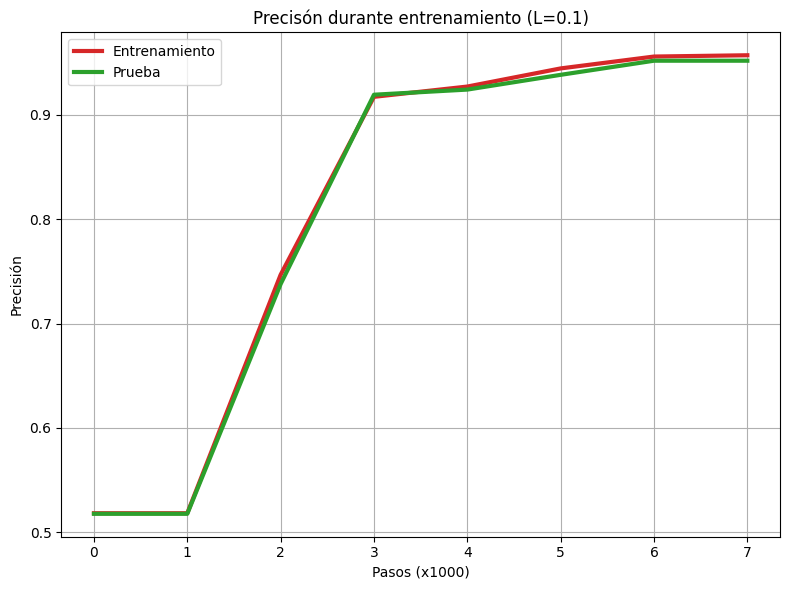

In [37]:
#Grafico comparativo entre la precisión del entrenamiento y la precisión de la prueba

import matplotlib.pyplot as plt

fmt_train = {
    'color': 'tab:red',
    'ls': 'solid',
    'lw': 3,
}
fmt_test = {
    'color': 'tab:green',
    'ls': 'solid',
    'lw': 3,
}

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(accuracy_entrenamiento_l, label='Entrenamiento', **fmt_train)
ax.plot(accuracy_prueba_l, label='Prueba', **fmt_test)

ax.grid(which='both')
ax.legend()
ax.set_title(f'Precisón durante entrenamiento (L={L})')
ax.set_xlabel('Pasos (x1000)')
ax.set_ylabel('Precisión')
fig.tight_layout()
plt.show()

Se observa como la red va aprendiendo alejándose de la prueba

PARTE 3

Comparación con scikit-learn

Vamos a utilizar la herramienta scikit-learn para comparar los resultados que obtuvimos con Numpy.

In [44]:
import pandas as pd
# cargar datos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

hongos = pd.read_csv('mushrooms (1).csv', delimiter=",")

#Ahora transformo las variables categóricas en numéricas
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
hongos=df.apply(LabelEncoder().fit_transform)

# variables de entrada 
X_h = hongos.drop(columns=['Class']).values

# columna de salida 
Y_h = df['Class'].values

# Normalizar los datos
scaler = StandardScaler()
X_h = scaler.fit_transform(X_h)

# Separar los datos de entrenamiento y prueba
Xh_train, Xh_test, Yh_train, Yh_test = train_test_split(X_h, Y_h, test_size=1/5, random_state=30)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(32, 16 ), #Red con 2 capas ocultas; la primera de 32 neuronas y la segunda de 16
                   activation='relu',
                   max_iter=8000, #iteraciones
                   learning_rate_init=.1, #tasa de aprendizaje
                   alpha= 0.0001) #para que no haya overfitting

nn.fit(Xh_train, Yh_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print(nn.intercepts_)

print("Puntaje del conjunto de entrenamiento: %f" % nn.score(Xh_train, Yh_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(Xh_test, Yh_test))

[array([[-1.71233146e-01,  4.25818768e-02, -1.39765976e-01,
        -8.12485721e-02, -1.99177563e-01, -1.84253945e-01,
         3.49005658e-02, -1.20749465e-01, -3.28979096e-01,
         2.04497526e-01, -1.69420119e-01,  1.84017928e-01,
         1.91363200e-01, -1.43444386e-01, -4.83500166e-02,
         2.04673579e-01,  7.35357711e-02,  1.50375756e-01,
         2.52315808e-01,  1.65105011e-01,  4.70924135e-03,
         1.36564767e-01,  2.05457347e-01,  1.02629638e-01,
         2.36576201e-01,  1.70706111e-02, -8.32632279e-02,
         9.38838216e-02,  3.52236069e-01, -1.85925888e-01,
         7.45888502e-03, -6.31958158e-02],
       [ 1.37232410e-02,  8.11280254e-02,  1.16397197e-02,
         3.36381254e-01,  2.94246850e-02, -3.00588835e-01,
        -1.08212534e-01, -2.21485984e-01,  2.62171006e-01,
        -2.31885456e-01, -2.11415072e-02,  4.00623539e-01,
        -4.21507787e-01, -2.87777403e-02,  1.89883890e-01,
         3.21668611e-02, -3.06840024e-01, -1.72019894e-02,
        -1.3

Al realizar el cálculo con scikit-learn tenemos una precisión de un 100% tanto en el entrenamiento como en la prueba.
Puede ser que utilizando todas las variables, el modelo aprenda con mayor certeza a clasificar hongos, ya que con esta herramienta no dejé atrás colummnas.

Al comparar con el modelo de Numpy, podría llegar al 100% de precisión si se toman en cuenta más variables, funciones acordes, más iteraciones, pesos bien inicializados, entre otros.

PARTE 4

Conclusión:

El dataset de hongos utilizado en este trabajo es principalmente categórico, ya que todas sus variables (como color del sombrero, tamaño de las láminas, tipo de anillo, etc.) representan etiquetas discretas sin un orden numérico natural.

En contextos como este, existen algoritmos de aprendizaje automático especialmente adecuados para manejar variables categóricas de forma nativa, como:

DecisionTreeClassifier

RandomForestClassifier

Estas herramientas no requieren codificación numérica compleja ni normalización, y son capaces de identificar reglas de decisión directas del tipo:
"Si el color de las láminas es blanco y hay moretones, entonces el hongo es comestible", lo que las hace particularmente efectivas y fáciles de interpretar para este tipo de datos.

Si bien la elección del modelo no fue la óptima desde el punto de vista del tipo de datos, pero sí fue adecuada para cumplir con los objetivos pedagógicos de implementar y comprender una red neuronal desde cero, ya que, los modelos basados en árboles hubieran sido una mejor opción desde el punto de vista técnico para este dataset, decidí continuar utilizando redes neuronales, porque:

Ya había avanzado significativamente el trabajo práctico con este conjunto de datos.

La consigna del trabajo requería la implementación y entrenamiento de una red neuronal desde cero, sin utilizar librerías como TensorFlow o PyTorch.

Me permitió aplicar y reforzar conceptos clave como: forward propagation, backpropagation, funciones de activación, cálculo del costo, normalización, etc.

Por lo tanto, aunque reconozco que otra herramienta podría haber simplificado o mejorado el rendimiento del modelo, el objetivo académico y práctico del trabajo justificaba seguir con este enfoque.

Con el enfoque que le dí al trabajo, concluyo que hay que ver si conviene quitar muchas variables o elegirlas arbitrariamente, ya que de esa forma la precisión no fue más del 95,38%, mientras que utilizando todas las variables del data set con scikit-learn obtuve una precisión del 100%.

De todas formas armar un modelo a mano, y adecuarlo para que el mismo funcione acorde a ciertas consignas, fue divertido de explorar. Asimismo me hubiese gustado haberle invertido más tiempo a la elección del Data Set, aunque el tema me sigue pareciendo el más divertido de todas las opciones que vi en kaggel.
